![DBAPI](VeritabaniBaglanti.png)

* https://peps.python.org/pep-0249/
* https://www.sqlite.org/download.html
* https://sqlitestudio.pl/
* https://www.connectionstrings.com/

In [ ]:
# sqlite a bağlanmak için gerekli kütüphane
import sqlite3

In [ ]:
con = sqlite3.connect("./databases/mesajDB.db") # dosyayı veratabanı olarak kullanacak
dir(con)

In [ ]:
# tablo oluşturalım
con.execute("""
CREATE TABLE mesaj
(
    Id int,
    Metin nvarchar(100)
)
""")

In [ ]:
# tabloyu silmek istersek
con.execute("DROP TABLE mesaj")

In [ ]:
# kayıt girelim
con.execute("INSERT INTO mesaj VALUES(1, '1. Kayıt')")
con.execute("INSERT INTO mesaj VALUES(2, '2. Kayıt')")
con.execute("INSERT INTO mesaj VALUES(3, '3. Kayıt')")
con.execute("INSERT INTO mesaj VALUES(4, '4. Kayıt')")
con.execute("INSERT INTO mesaj VALUES(5, '5. Kayıt')")

con.commit() # yapılan değişikliklerin onaylanması
# con.rollback() # bilinçli olarak yapılanları geri almak

In [ ]:
imlec = con.execute("SELECT * FROM mesaj LIMIT 2")

In [ ]:
imlec.description

In [ ]:
imlec.fetchall() # tüm satır ve kolonları getirir, satırlar liste içerisinde, kolonlar tuple olarak gelir.

In [ ]:
con.close()

### Pandas ile okuma
![PandasDF](PandasDF.png)

In [ ]:
import sqlite3

con = sqlite3.connect("./databases/mesajDB.db")

In [ ]:
import pandas as pd

df = pd.read_sql("SELECT * FROM mesaj", con) # dataframe
con.close()

In [ ]:
type(df)

In [ ]:
df.head(3) # ilk üç satır gelsin

In [ ]:
df.tail(2) # alttan 2 satır getir.

In [ ]:
df.sample(4)

In [ ]:
df.query("Id == 4") # Id si 4 olan satırı getir. pandasın sunmuş olduğu query fonksiyonu ile çalıştırdım.

In [ ]:
df.Metin # sadece Metin kolonu değeleri

In [ ]:
# iloc ile satır ve sutun sıra numarası kullanarak istediğim bölümü getirebilirim
# ör: 2. satır, 0 ve 1. kolon gelsin
df.iloc[2, [0,1]]

In [ ]:
df.loc[0:5:2, ["Id","Metin"]] # 0 ile 5. satırları 2 şer atlayıp getir. Id ve Metin kolonları gelsin.

### Veri Görselleştirme

- matplotlib kütüphanesi bu konudaki en temel kütüphanedir.

In [3]:
from matplotlib import pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10]

In [4]:
import numpy as np

x_array = np.array(x)

y_array2 = x_array ** 2 # herhangi bir işlem tüm elemanlara uygulanır.
y_array3 = x_array ** 3

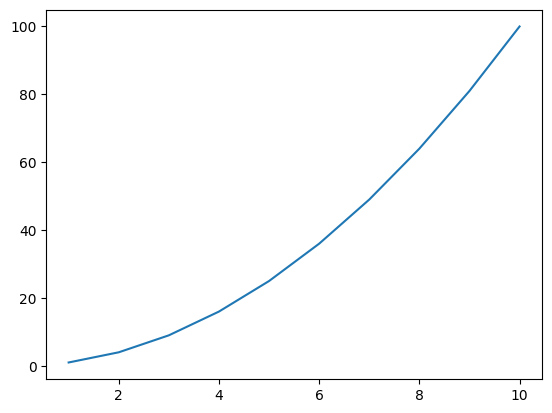

In [5]:
plt.plot(x, y_array2)

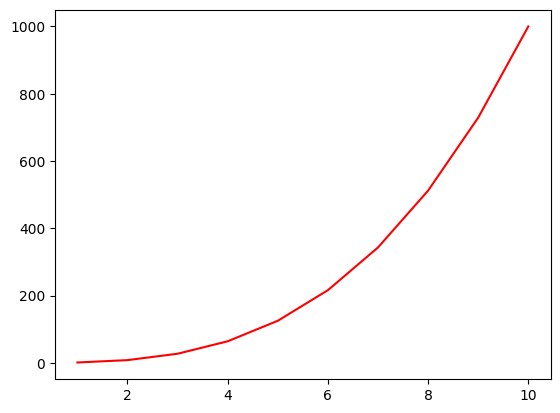

In [6]:
plt.plot(x, y_array3, color="red")

### MSSQL (veya Oracle) ile Çalışmak
![MSSQLORACLE](MSSQLveOracleBaglanti.png)

In [7]:
!pip install pyodbc

     -------------------------------------- 66.1/66.1 kB 900.8 kB/s eta 0:00:00


In [8]:
!pip install cx-Oracle

     -------------------------------------- 213.2/213.2 kB 1.2 MB/s eta 0:00:00


In [9]:
import pyodbc # import cx_Oracle

In [10]:
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client 11.0',
 'ODBC Driver 13 for SQL Server',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

In [28]:
con_str = "Driver={ODBC Driver 17 for SQL Server};Server=localhost;Database=AdventureWorks2012;Trusted_Connection=yes;"

con = pyodbc.connect(con_str) # cx_Oracle.connect(con_str)

In [20]:
imlec = con.execute("SELECT @@version")
imlec.fetchone() # tek hücre gelecek

('Microsoft SQL Server 2016 (RTM-GDR) (KB4019088) - 13.0.1742.0 (X64) \n\tJul  5 2017 23:41:17 \n\tCopyright (c) Microsoft Corporation\n\tEnterprise Edition (64-bit) on Windows 10 Education 6.3 <X64> (Build 19045: ) (Hypervisor)\n', )

In [25]:
imlec = con.execute("SELECT Name, ListPrice, Color FROM Production.Product")

In [26]:
imlec.fetchone()

('Adjustable Race', Decimal('0.0000'), None)

In [29]:
import pandas as pd

df = pd.read_sql("SELECT Name, ListPrice, Color FROM Production.Product", con)
df.head()

C:\Users\ragip\AppData\Local\Temp\ipykernel_14304\1269171495.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT Name, ListPrice, Color FROM Production.Product", con)


,Name,ListPrice,Color
0,Adjustable Race,0.0,None
1,Bearing Ball,0.0,None
2,BB Ball Bearing,0.0,None
3,Headset Ball Bearings,0.0,None
4,Blade,0.0,None


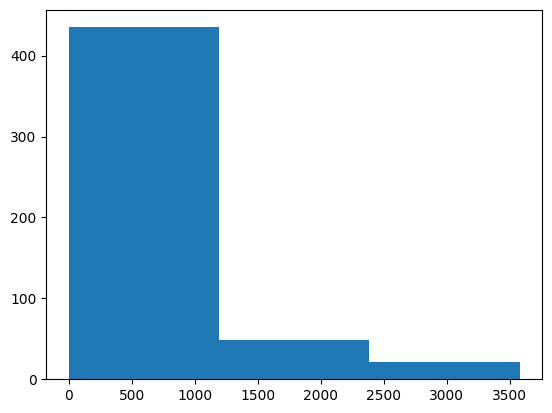

In [30]:
plt.hist(df.ListPrice, bins=3)
plt.show()

In [31]:
con.close()